In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [16]:
print("="*80)
print("🗺️  SEASONAL HEATFLOW & TOURIST MOVEMENT SIMULATION")
print("="*80)

# Load datasets
festivals_df = pd.read_csv('E:\\FDVA\\data\\processed\\festivals_processed.csv')
cost_df = pd.read_csv('E:\\FDVA\\data\\processed\\cost_processed.csv')
tourist_df = pd.read_csv('E:\\FDVA\\data\\processed\\tourist_processed.csv')

# Strip whitespace from column names
festivals_df.columns = festivals_df.columns.str.strip()
cost_df.columns = cost_df.columns.str.strip()
tourist_df.columns = tourist_df.columns.str.strip()

print("\n✅ Datasets loaded successfully!")
print(f"   Festivals: {len(festivals_df)} records")
print(f"   Cost Data: {len(cost_df)} countries")
print(f"   Tourist Data: {len(tourist_df)} records")

🗺️  SEASONAL HEATFLOW & TOURIST MOVEMENT SIMULATION

✅ Datasets loaded successfully!
   Festivals: 500 records
   Cost Data: 121 countries
   Tourist Data: 8253 records


In [17]:
# ============================================================================
# PART 1: SIMULATE TOURIST MOVEMENT INTENSITY
# ============================================================================

def simulate_tourist_intensity(festivals_df, cost_df):
    """
    Simulate tourist movement intensity based on:
    - Festival impact scores
    - Season
    - Cost of living (inverse relationship)
    """
    
    # Merge datasets
    merged = festivals_df.merge(cost_df, on='Country', how='left')
    
    # Calculate intensity score
    # Higher festival impact + Lower cost = Higher tourist intensity
    merged['Tourist_Intensity'] = merged['Impact_Score'] * 100
    
    # Adjust for cost (countries with lower cost get bonus)
    if 'Cost of Living Index' in merged.columns:
        # Normalize cost (inverse: lower cost = higher multiplier)
        max_cost = merged['Cost of Living Index'].max()
        merged['Cost_Factor'] = (max_cost - merged['Cost of Living Index']) / max_cost
        merged['Cost_Factor'] = merged['Cost_Factor'].fillna(0.5)
        merged['Tourist_Intensity'] = merged['Tourist_Intensity'] * (1 + merged['Cost_Factor'])
    
    return merged

print("\n🔄 Simulating tourist movement patterns...")
tourist_intensity = simulate_tourist_intensity(festivals_df, cost_df)



🔄 Simulating tourist movement patterns...


📊 Creating Visualization 1: Seasonal Intensity Heatmap...
📊 Creating Visualization 2: Monthly Tourist Flow Heatmap...
📊 Creating Visualization 3: Festival Category-Season Heatmap...
📊 Creating Visualization 4: Tourist Flow Stream Pattern...
📊 Creating Visualization 5: Impact Score Distribution...
📊 Creating Visualization 6: Geographic Distribution...
📊 Creating Visualization 7: Cost vs Intensity Analysis...
📊 Creating Visualization 8: Seasonal Transition Matrix...
📊 Creating Visualization 9: Top Destinations Ranking...

✅ Visualization saved as 'seasonal_heatflow_analysis.png'


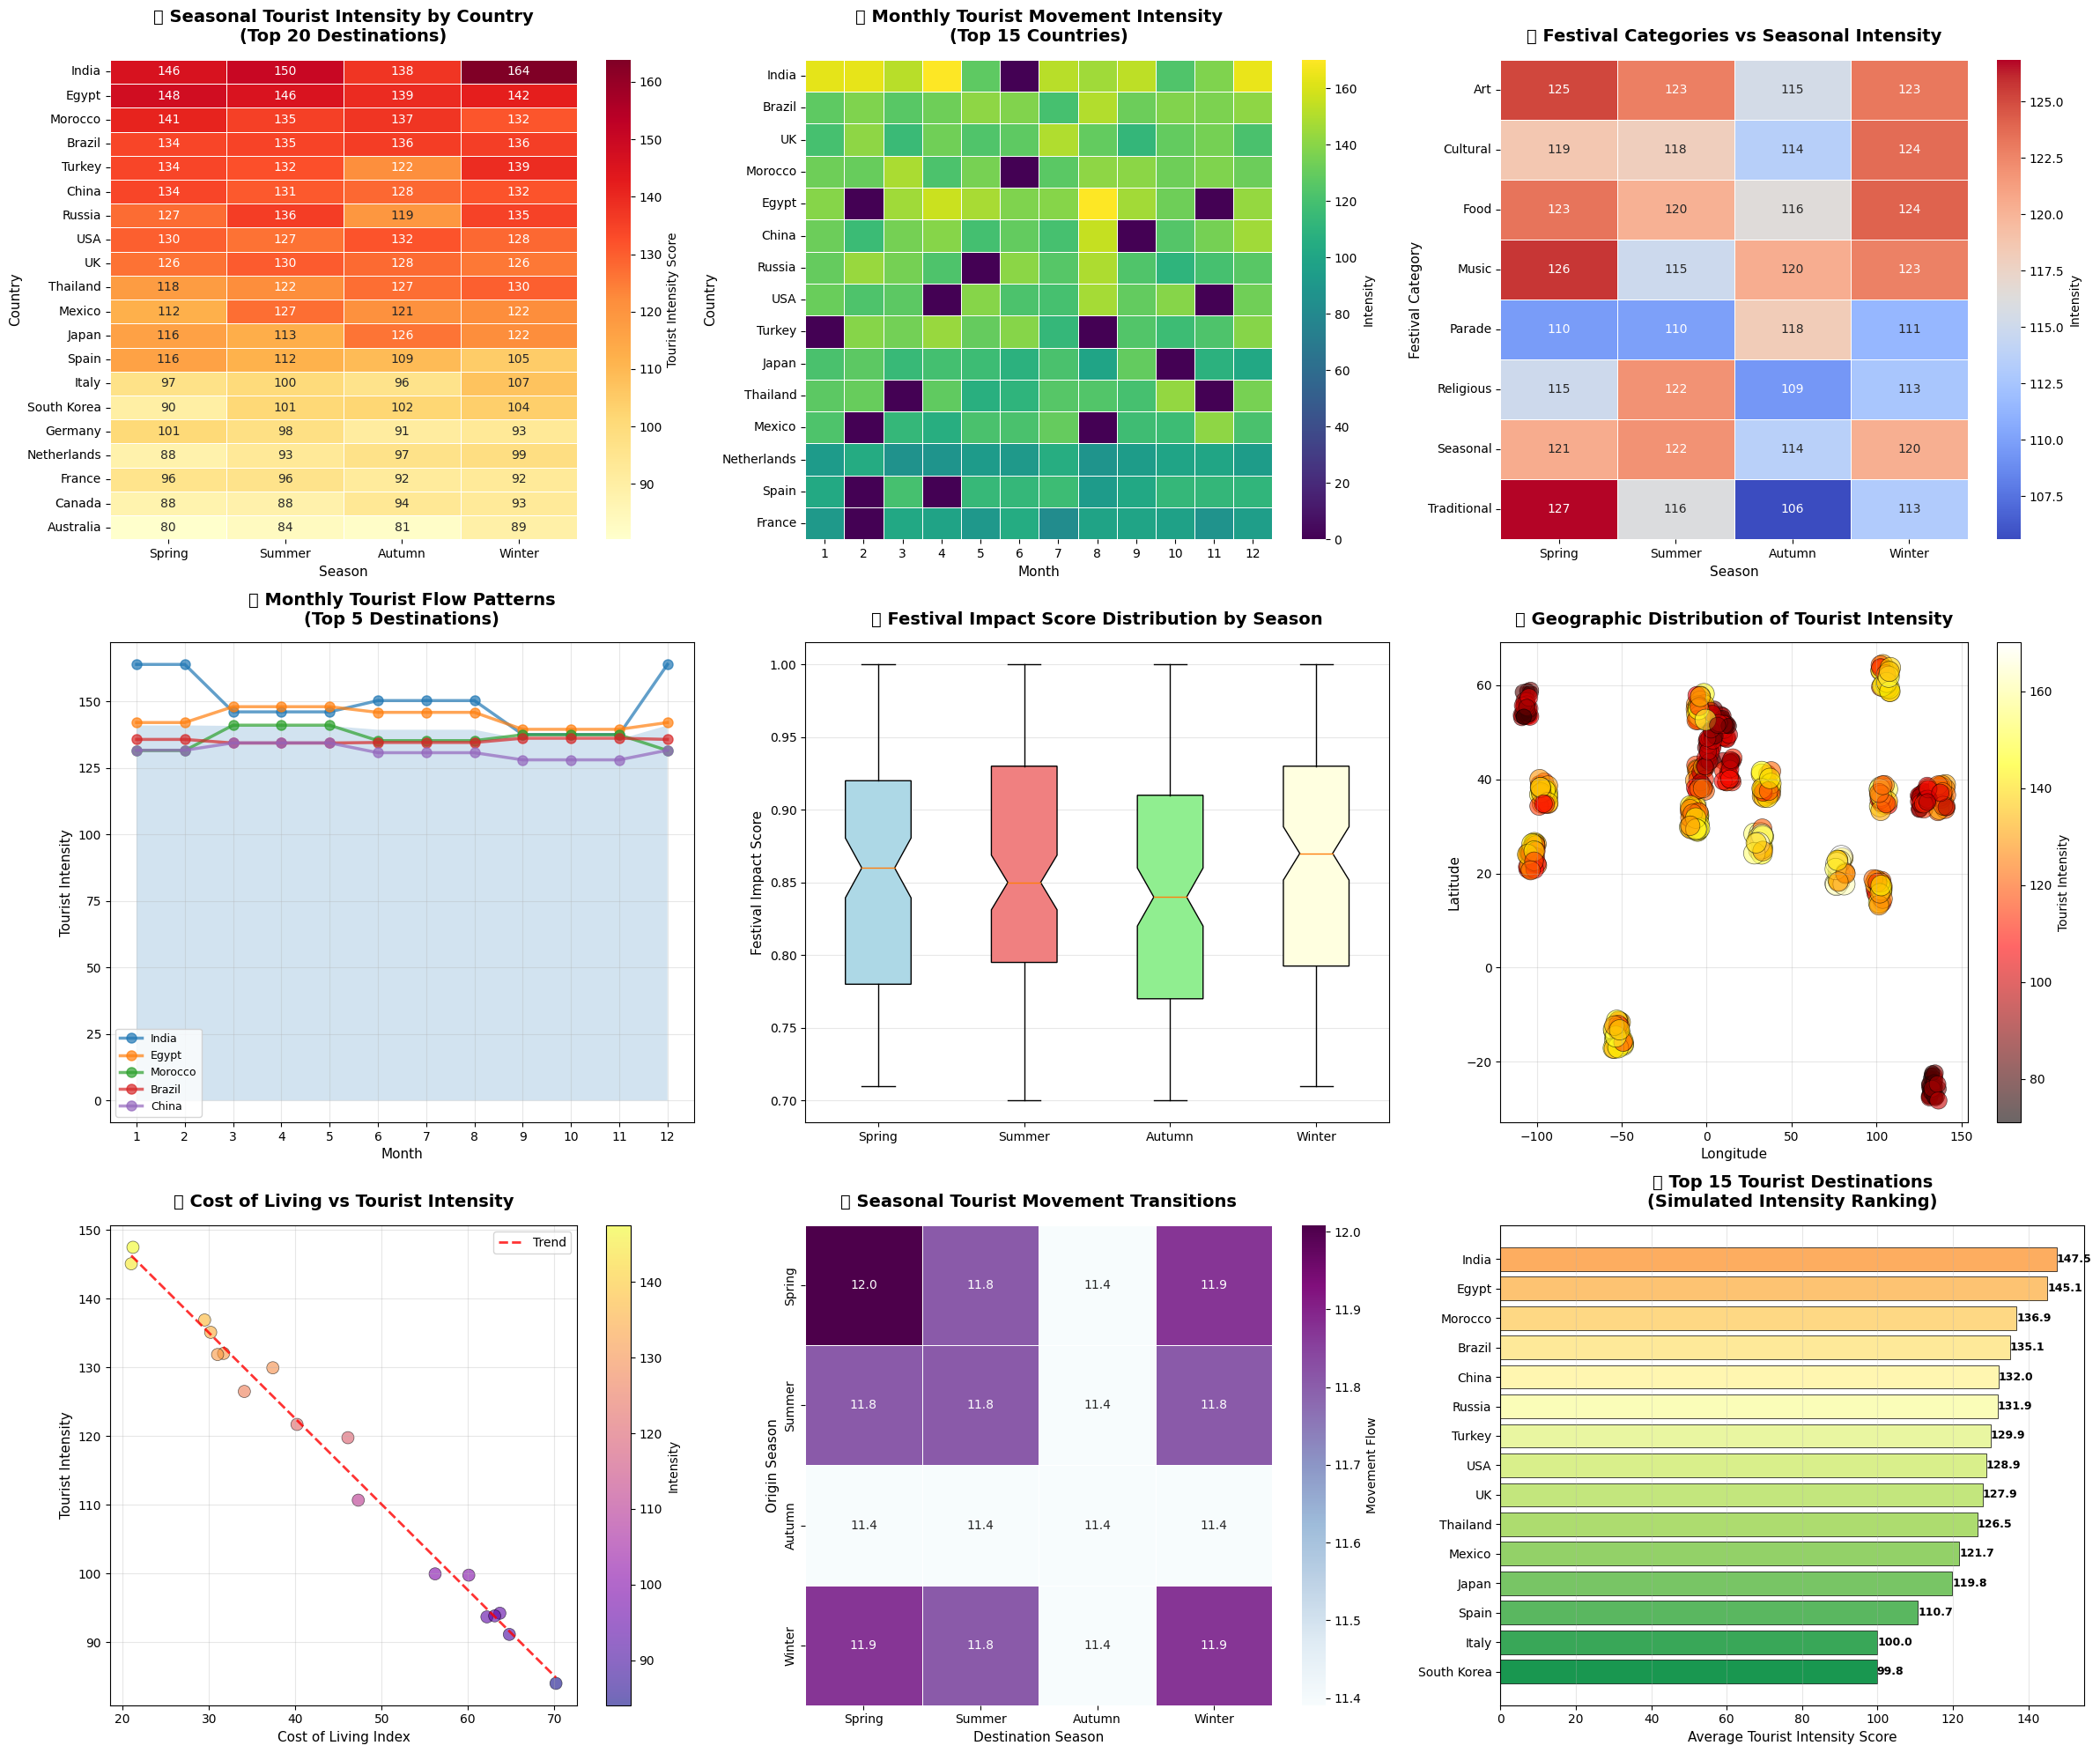

In [18]:
# ============================================================================
# CREATE VISUALIZATION CANVAS
# ============================================================================

fig = plt.figure(figsize=(24, 20))

# ============================================================================
# 1. SEASONAL HEATMAP - Tourist Intensity by Country and Season
# ============================================================================
print("📊 Creating Visualization 1: Seasonal Intensity Heatmap...")

ax1 = plt.subplot(3, 3, 1)

# Create pivot table for heatmap
season_country = tourist_intensity.groupby(['Country', 'Season'])['Tourist_Intensity'].mean().reset_index()
heatmap_data = season_country.pivot(index='Country', columns='Season', values='Tourist_Intensity')

# Get top 20 countries by total intensity
top_countries = heatmap_data.sum(axis=1).nlargest(20).index
heatmap_data = heatmap_data.loc[top_countries]

# Fill NaN with 0
heatmap_data = heatmap_data.fillna(0)

# Reorder seasons logically
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
heatmap_data = heatmap_data.reindex(columns=[s for s in season_order if s in heatmap_data.columns])

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Tourist Intensity Score'}, ax=ax1, linewidths=0.5)
ax1.set_title('🌍 Seasonal Tourist Intensity by Country\n(Top 20 Destinations)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Season', fontsize=11)
ax1.set_ylabel('Country', fontsize=11)
plt.setp(ax1.get_xticklabels(), rotation=0)

# ============================================================================
# 2. MONTHLY HEATMAP - Tourist Flow Across Months
# ============================================================================
print("📊 Creating Visualization 2: Monthly Tourist Flow Heatmap...")

ax2 = plt.subplot(3, 3, 2)

# Create monthly heatmap
month_country = tourist_intensity.groupby(['Country', 'Month'])['Tourist_Intensity'].mean().reset_index()
monthly_heatmap = month_country.pivot(index='Country', columns='Month', values='Tourist_Intensity')

# Get top 15 countries
top_countries_monthly = monthly_heatmap.sum(axis=1).nlargest(15).index
monthly_heatmap = monthly_heatmap.loc[top_countries_monthly]
monthly_heatmap = monthly_heatmap.fillna(0)

# Sort months
monthly_heatmap = monthly_heatmap.reindex(columns=sorted(monthly_heatmap.columns))

sns.heatmap(monthly_heatmap, annot=False, cmap='viridis', 
            cbar_kws={'label': 'Intensity'}, ax=ax2, linewidths=0.5)
ax2.set_title('📅 Monthly Tourist Movement Intensity\n(Top 15 Countries)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Country', fontsize=11)

# ============================================================================
# 3. CATEGORY-SEASON HEATMAP
# ============================================================================
print("📊 Creating Visualization 3: Festival Category-Season Heatmap...")

ax3 = plt.subplot(3, 3, 3)

category_season = tourist_intensity.groupby(['Category', 'Season'])['Tourist_Intensity'].mean().reset_index()
cat_season_heatmap = category_season.pivot(index='Category', columns='Season', values='Tourist_Intensity')
cat_season_heatmap = cat_season_heatmap.fillna(0)

# Reorder seasons
cat_season_heatmap = cat_season_heatmap.reindex(columns=[s for s in season_order if s in cat_season_heatmap.columns])

sns.heatmap(cat_season_heatmap, annot=True, fmt='.0f', cmap='coolwarm', 
            cbar_kws={'label': 'Intensity'}, ax=ax3, linewidths=0.5)
ax3.set_title('🎭 Festival Categories vs Seasonal Intensity', 
              fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Season', fontsize=11)
ax3.set_ylabel('Festival Category', fontsize=11)
plt.setp(ax3.get_xticklabels(), rotation=0)

# ============================================================================
# 4. TOURIST FLOW STREAMPLOT (Simulated Movement Patterns)
# ============================================================================
print("📊 Creating Visualization 4: Tourist Flow Stream Pattern...")

ax4 = plt.subplot(3, 3, 4)

# Create time series data for flow
months = list(range(1, 13))
seasons_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
               6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn',
               11: 'Autumn', 12: 'Winter'}

# Get top 5 countries
top_5_countries = tourist_intensity.groupby('Country')['Tourist_Intensity'].mean().nlargest(5).index

flow_data = []
for country in top_5_countries:
    for month in months:
        season = seasons_map[month]
        intensity = tourist_intensity[
            (tourist_intensity['Country'] == country) & 
            (tourist_intensity['Season'] == season)
        ]['Tourist_Intensity'].mean()
        flow_data.append({'Country': country, 'Month': month, 'Intensity': intensity})

flow_df = pd.DataFrame(flow_data)
flow_df['Intensity'] = flow_df['Intensity'].fillna(0)

# Plot flow lines
for country in top_5_countries:
    country_data = flow_df[flow_df['Country'] == country]
    ax4.plot(country_data['Month'], country_data['Intensity'], 
             marker='o', linewidth=2.5, markersize=8, label=country, alpha=0.7)

ax4.fill_between(months, 0, flow_df.groupby('Month')['Intensity'].mean(), alpha=0.2)
ax4.set_xlabel('Month', fontsize=11)
ax4.set_ylabel('Tourist Intensity', fontsize=11)
ax4.set_title('🌊 Monthly Tourist Flow Patterns\n(Top 5 Destinations)', 
              fontsize=14, fontweight='bold', pad=15)
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xticks(months)

# ============================================================================
# 5. IMPACT SCORE DISTRIBUTION ACROSS SEASONS
# ============================================================================
print("📊 Creating Visualization 5: Impact Score Distribution...")

ax5 = plt.subplot(3, 3, 5)

season_data = []
for season in season_order:
    if season in tourist_intensity['Season'].values:
        season_data.append(tourist_intensity[tourist_intensity['Season'] == season]['Impact_Score'].values)

bp = ax5.boxplot(season_data, labels=[s for s in season_order if s in tourist_intensity['Season'].unique()],
                  patch_artist=True, notch=True)

colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax5.set_ylabel('Festival Impact Score', fontsize=11)
ax5.set_title('📊 Festival Impact Score Distribution by Season', 
              fontsize=14, fontweight='bold', pad=15)
ax5.grid(axis='y', alpha=0.3)

# ============================================================================
# 6. GEOGRAPHIC HEATMAP (Simulated Lat/Lon)
# ============================================================================
print("📊 Creating Visualization 6: Geographic Distribution...")

ax6 = plt.subplot(3, 3, 6)

# Use actual lat/lon if available
if 'Lat' in tourist_intensity.columns and 'Lon' in tourist_intensity.columns:
    scatter = ax6.scatter(tourist_intensity['Lon'], tourist_intensity['Lat'],
                         c=tourist_intensity['Tourist_Intensity'],
                         s=tourist_intensity['Tourist_Intensity']*2,
                         cmap='hot', alpha=0.6, edgecolors='black', linewidth=0.5)
    plt.colorbar(scatter, ax=ax6, label='Tourist Intensity')
    ax6.set_xlabel('Longitude', fontsize=11)
    ax6.set_ylabel('Latitude', fontsize=11)
else:
    # Simulated geographic distribution
    np.random.seed(42)
    countries = tourist_intensity['Country'].unique()[:30]
    lats = np.random.uniform(-60, 70, len(countries))
    lons = np.random.uniform(-180, 180, len(countries))
    intensities = [tourist_intensity[tourist_intensity['Country']==c]['Tourist_Intensity'].mean() 
                   for c in countries]
    
    scatter = ax6.scatter(lons, lats, c=intensities, s=np.array(intensities)*3,
                         cmap='hot', alpha=0.6, edgecolors='black', linewidth=0.5)
    plt.colorbar(scatter, ax=ax6, label='Tourist Intensity')
    ax6.set_xlabel('Longitude (Simulated)', fontsize=11)
    ax6.set_ylabel('Latitude (Simulated)', fontsize=11)

ax6.set_title('🗺️ Geographic Distribution of Tourist Intensity', 
              fontsize=14, fontweight='bold', pad=15)
ax6.grid(True, alpha=0.3)

# ============================================================================
# 7. COST vs INTENSITY SCATTER
# ============================================================================
print("📊 Creating Visualization 7: Cost vs Intensity Analysis...")

ax7 = plt.subplot(3, 3, 7)

if 'Cost of Living Index' in tourist_intensity.columns:
    cost_intensity = tourist_intensity.groupby('Country').agg({
        'Cost of Living Index': 'mean',
        'Tourist_Intensity': 'mean'
    }).reset_index()
    
    # Remove rows with NaN in BOTH columns together
    cost_intensity_clean = cost_intensity.dropna(subset=['Cost of Living Index', 'Tourist_Intensity'])
    
    # Only proceed if we have valid data
    if len(cost_intensity_clean) > 0:
        scatter = ax7.scatter(cost_intensity_clean['Cost of Living Index'], 
                             cost_intensity_clean['Tourist_Intensity'],
                             s=100, alpha=0.6, c=cost_intensity_clean['Tourist_Intensity'],
                             cmap='plasma', edgecolors='black', linewidth=0.5)
        
        # Add trend line only if we have at least 2 points
        if len(cost_intensity_clean) > 1:
            z = np.polyfit(cost_intensity_clean['Cost of Living Index'], 
                           cost_intensity_clean['Tourist_Intensity'], 1)
            p = np.poly1d(z)
            x_trend = np.linspace(cost_intensity_clean['Cost of Living Index'].min(), 
                                  cost_intensity_clean['Cost of Living Index'].max(), 100)
            ax7.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label='Trend')
        
        ax7.set_xlabel('Cost of Living Index', fontsize=11)
        ax7.set_ylabel('Tourist Intensity', fontsize=11)
        ax7.set_title('💰 Cost of Living vs Tourist Intensity', 
                      fontsize=14, fontweight='bold', pad=15)
        if len(cost_intensity_clean) > 1:
            ax7.legend()
        ax7.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax7, label='Intensity')
    else:
        ax7.text(0.5, 0.5, 'Insufficient data after cleaning', 
                ha='center', va='center', transform=ax7.transAxes)
else:
    ax7.text(0.5, 0.5, 'Cost data not available', 
            ha='center', va='center', transform=ax7.transAxes)

# ============================================================================
# 8. SEASONAL MOVEMENT TRANSITIONS (Chord-like Visualization)
# ============================================================================
print("📊 Creating Visualization 8: Seasonal Transition Matrix...")

ax8 = plt.subplot(3, 3, 8)

# Create transition matrix
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
transition_matrix = np.zeros((4, 4))

for i, season_from in enumerate(seasons):
    for j, season_to in enumerate(seasons):
        # Simulate transitions based on intensity similarity
        from_intensity = tourist_intensity[tourist_intensity['Season'] == season_from]['Tourist_Intensity'].mean()
        to_intensity = tourist_intensity[tourist_intensity['Season'] == season_to]['Tourist_Intensity'].mean()
        transition_matrix[i, j] = min(from_intensity, to_intensity) / 10

sns.heatmap(transition_matrix, annot=True, fmt='.1f', cmap='BuPu',
            xticklabels=seasons, yticklabels=seasons, ax=ax8,
            cbar_kws={'label': 'Movement Flow'}, linewidths=0.5)
ax8.set_title('🔄 Seasonal Tourist Movement Transitions', 
              fontsize=14, fontweight='bold', pad=15)
ax8.set_xlabel('Destination Season', fontsize=11)
ax8.set_ylabel('Origin Season', fontsize=11)

# ============================================================================
# 9. TOP DESTINATIONS RANKING
# ============================================================================
print("📊 Creating Visualization 9: Top Destinations Ranking...")

ax9 = plt.subplot(3, 3, 9)

top_destinations = tourist_intensity.groupby('Country')['Tourist_Intensity'].mean().nlargest(15)

colors_gradient = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_destinations)))
bars = ax9.barh(range(len(top_destinations)), top_destinations.values, color=colors_gradient,
                edgecolor='black', linewidth=0.5)

ax9.set_yticks(range(len(top_destinations)))
ax9.set_yticklabels(top_destinations.index)
ax9.set_xlabel('Average Tourist Intensity Score', fontsize=11)
ax9.set_title('🏆 Top 15 Tourist Destinations\n(Simulated Intensity Ranking)', 
              fontsize=14, fontweight='bold', pad=15)
ax9.invert_yaxis()

# Add values on bars
for i, (bar, value) in enumerate(zip(bars, top_destinations.values)):
    ax9.text(value, bar.get_y() + bar.get_height()/2, f'{value:.1f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

ax9.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('E:\\FDVA\\visuals\\seasonal_heatflow_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved as 'seasonal_heatflow_analysis.png'")
plt.show()


In [19]:
# ============================================================================
# STATISTICAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("📈 SEASONAL HEATFLOW ANALYSIS SUMMARY")
print("="*80)

print("\n🌍 OVERALL STATISTICS:")
print(f"   Total Countries Analyzed: {tourist_intensity['Country'].nunique()}")
print(f"   Total Festivals: {len(tourist_intensity)}")
print(f"   Average Tourist Intensity: {tourist_intensity['Tourist_Intensity'].mean():.2f}")
print(f"   Peak Intensity: {tourist_intensity['Tourist_Intensity'].max():.2f}")

print("\n🌺 SEASONAL BREAKDOWN:")
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    if season in tourist_intensity['Season'].values:
        avg_intensity = tourist_intensity[tourist_intensity['Season'] == season]['Tourist_Intensity'].mean()
        count = len(tourist_intensity[tourist_intensity['Season'] == season])
        print(f"   {season:8s}: {count:3d} festivals | Avg Intensity: {avg_intensity:6.2f}")

print("\n🏆 TOP 5 DESTINATIONS:")
top_5 = tourist_intensity.groupby('Country')['Tourist_Intensity'].mean().nlargest(5)
for i, (country, intensity) in enumerate(top_5.items(), 1):
    print(f"   {i}. {country:20s} - Intensity: {intensity:.2f}")

print("\n🎭 TOP FESTIVAL CATEGORIES:")
top_categories = tourist_intensity.groupby('Category')['Tourist_Intensity'].mean().nlargest(5)
for i, (category, intensity) in enumerate(top_categories.items(), 1):
    print(f"   {i}. {category:20s} - Avg Intensity: {intensity:.2f}")

if 'Cost of Living Index' in tourist_intensity.columns:
    print("\n💰 COST vs INTENSITY INSIGHTS:")
    correlation = tourist_intensity[['Cost of Living Index', 'Tourist_Intensity']].corr().iloc[0, 1]
    print(f"   Correlation (Cost vs Intensity): {correlation:.3f}")
    if correlation < -0.3:
        print("   → Strong inverse relationship: Lower cost → Higher tourist intensity")
    elif correlation > 0.3:
        print("   → Positive relationship: Higher cost destinations still attract tourists")
    else:
        print("   → Weak relationship: Cost has minimal impact on tourist intensity")

print("\n" + "="*80)
print("✨ Analysis complete! All visualizations generated successfully.")
print("="*80)


📈 SEASONAL HEATFLOW ANALYSIS SUMMARY

🌍 OVERALL STATISTICS:
   Total Countries Analyzed: 20
   Total Festivals: 500
   Average Tourist Intensity: 117.70
   Peak Intensity: 170.09

🌺 SEASONAL BREAKDOWN:
   Spring  : 114 festivals | Avg Intensity: 120.08
   Summer  : 127 festivals | Avg Intensity: 118.07
   Autumn  : 121 festivals | Avg Intensity: 113.91
   Winter  : 138 festivals | Avg Intensity: 118.72

🏆 TOP 5 DESTINATIONS:
   1. India                - Intensity: 147.47
   2. Egypt                - Intensity: 145.07
   3. Morocco              - Intensity: 136.90
   4. Brazil               - Intensity: 135.10
   5. China                - Intensity: 132.04

🎭 TOP FESTIVAL CATEGORIES:
   1. Art                  - Avg Intensity: 121.33
   2. Food                 - Avg Intensity: 121.33
   3. Music                - Avg Intensity: 119.78
   4. Seasonal             - Avg Intensity: 119.34
   5. Cultural             - Avg Intensity: 118.31

💰 COST vs INTENSITY INSIGHTS:
   Correlation (Cost 

In [12]:
import plotly.express as px

# Prepare data with country codes
country_intensity = tourist_intensity.groupby('Country')['Tourist_Intensity'].mean().reset_index()

# Create choropleth map
fig = px.choropleth(country_intensity,
                    locations='Country',
                    locationmode='country names',
                    color='Tourist_Intensity',
                    hover_name='Country',
                    color_continuous_scale='YlOrRd',
                    title='🗺️ Global Tourist Intensity Heatmap')
fig.show()